# Solar System Take 2

#### The Runge-Kutta Method using Differential Equations package and RK4.


In [81]:
using Plots, LinearAlgebra, LaTeXStrings, DifferentialEquations
const G = 6.67430e-11;  # Gravitational constant (m^3 kg^-1 s^-2)
const Mₑ = 5.972e24;     # mass of Earth
const Mₘ = 0.330e24;
const AU = 1.496e11;    # astronomical unit
const Mₛ = 1.989e30;    # mass sun
mutable struct Planet
    m::Float64
    r::Vector{Float64}
    v::Vector{Float64}
end
sun = Planet(1.989e30, [0.0, 0.0], [0.0, 0.0]);
mercury = Planet(0.330e24, [57.9e9, 0.0], [0.0, 47.4e3]);
earth = Planet(5.972e24, [1.496e11, 0.0], [0.0, 30e3]); 

In [70]:


# Define the system of differential equations for Earth's motion
function earth_motion!(dr, r, p, t)
    # r is the position vector of Earth relative to the Sun
    # p is an array of parameters (not used in this case)
    # dr is the derivative of r with respect to time (i.e. the velocity)
    # t is the current time (not used in this case)
    r_norm = norm(earth.r-sun.r)
    dr = -G * Mₑ .* (earth.r-sun.r) / r_norm^3    
end

# Define the time span for the simulation (1 year = 365.25 days)
tspan = (0.0, 365.25)

# Define the initial value problem (IVP) for Earth's motion
prob = ODEProblem(earth_motion!, earth.r, tspan)

# Solve the IVP using the RK4 method with default settings
sol = solve(prob, RK4())

# Plot the trajectory of Earth's motion
# print result
sol.t

9-element Vector{Float64}:
   0.0
   9.999999999999999e-5
   0.0010999999999999998
   0.011099999999999997
   0.11109999999999996
   1.1110999999999995
  11.111099999999993
 111.11109999999994
 365.25

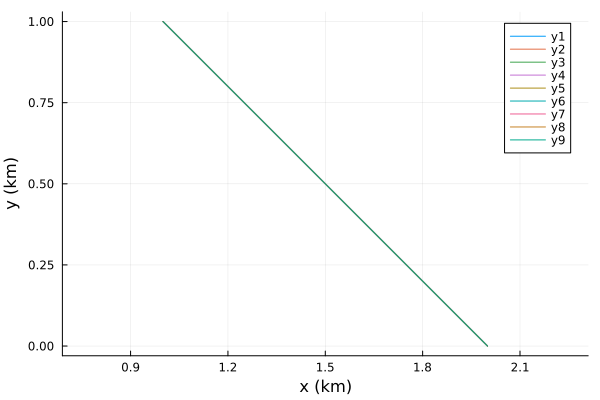

In [62]:
using Plots
plot(sol.u/1.496e11, aspect_ratio=:equal, xlabel="x (km)", ylabel="y (km)", zlabel="z (km)")

In [72]:
earth.r

2-element Vector{Float64}:
 1.496e11
 0.0

In [80]:
function earth_motion!(dr, r, p, t)
    r_norm = norm(r - sun.r)
    dr[1:2] = r[1:2] # set velocity vector dr = v
    dr[1:2] = -G * sun.m / r_norm^3 .* (r[1:2] - sun.r) # set acceleration vector dr = a
end

# Define the time span for the simulation (1 year = 365.25 days)
tspan = (0.0, 10000)

# Define the initial value problem (IVP) for Earth's motion
prob = ODEProblem(earth_motion!, earth.r, tspan)

# Solve the IVP using the RK4 method with default settings
sol = solve(prob, RK4())

# Plot the trajectory of Earth's motion
# print result
sol[1,:]

LoadError: invalid redefinition of constant tspan